<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [15]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [51]:
df = pd.read_csv("data/job_listings.csv")

In [52]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [53]:
# from bs4 import BeautifulSoup
# import requests
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text).replace('\\n', "")

df.description = df.description.apply(remove_html_tags)
df.drop(df.columns[0], inplace=True, axis=1)

In [54]:
df.head()

,description,title
0,"b""Job Requirements:Conceptual understanding in...",Data scientist
1,"b'Job DescriptionAs a Data Scientist 1, you wi...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [55]:
cv = CountVectorizer(ngram_range=(1, 2),
                     max_df=.97,
                     min_df=20,
                     tokenizer=tokenize)

In [56]:
vec_df = pd.DataFrame(cv.fit_transform(df.description).todense(), columns=cv.get_feature_names() )
vec_df.head()

,$,+,+ year,1,10,100,2,2019,3,3 year,...,writing,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,2,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
vec_df.shape # think more cleaning is neeccessary

(426, 1178)

In [58]:
token_count = [(col, vec_df[col].sum()) for col in vec_df]
token_count.sort(key=lambda x: x[1], reverse=True)
token_count[:10]

[('datum', 2884),
 ('work', 1387),
 ('data', 1328),
 ('team', 1203),
 ('business', 1171),
 ('experience', 1153),
 ('science', 924),
 ('product', 825),
 ('model', 748),
 ('analytic', 708)]

## 4) Visualize the most common word counts

/home/allan/.local/share/virtualenvs/u4-s1-1fz81KSO/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


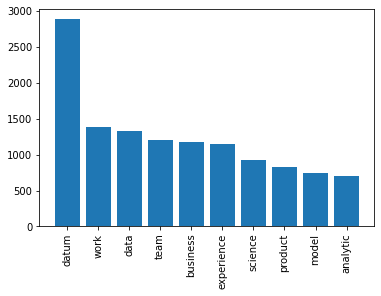

In [59]:
fig, ax = plt.subplots()

ax.bar(range(1, 11), height=[i[-1] for i in token_count[:10]])
ax.set_xticks(range(1, 11))
ax.set_xticklabels([i[0] for i in token_count[:10]], rotation='vertical')

fig.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [60]:
tfid = TfidfVectorizer(ngram_range=(1, 2),
                       max_df=.97,
                       min_df=20,
                       tokenizer=tokenize)

In [61]:
tf_df = pd.DataFrame(tfid.fit_transform(df.description).todense(), columns=tfid.get_feature_names())
tf_df.head()

,$,+,+ year,1,10,100,2,2019,3,3 year,...,writing,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.146561,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.040453,0.044172,0.152537,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.081979,0.028957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.249082,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.035539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.226654,0.247489,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.162243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [62]:
from sklearn.neighbors import NearestNeighbors

nearest = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nearest.fit(tf_df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [63]:
ideal = ["""
Title: Jr. Data Scientist
Pay is $130k
Benefits include medical insurance & 401k
Remote
Responsibilities include: Applied modeling, database, data engineering
Technologies inclued: SQL, Python
"""]

In [64]:
nearest.kneighbors(tfid.transform(ideal).todense())

(array([[1.25393172, 1.263599  , 1.27536722, 1.27977846, 1.28256173]]),
 array([[168, 117,  19, 325, 345]]))

In [70]:
df.description[168]

'b"Logistics done differently.At XPO Logistics, we invest over $450 million in technology every year so that we can continue to develop state-of-the-art solutions for our customers. As the Data Scientist, you will be responsible for developing analytical experiments in a methodical manner and regularly evaluating alternate models to support strategic initiatives and ongoing business processes. You will work with leads, analysts and data producers/consumers to understand requirements, develop technical solutions and ensure the reliability and performance of the data solutions. Become a part of our growing, dynamic team and we\'ll help you build a career you can be proud of.Pay, benefits and more.We are eager to attract the best, so we offer competitive compensation and a generous benefits package, including full health insurance (medical, dental and vision), 401(k), life insurance, disability and the opportunity to participate in a company incentive plan.What you\\xe2\\x80\\x99ll do on 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 